In [43]:
import json
import numpy as np
import tensorflow as tf
from IPython.display import Image

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#### Let's set up the hyperparameters

In [70]:
vocab_size=7000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'
training_size=20000

#### Let's open the JSON file. The data source is mentioned in Week 1 Jupyter notebook

In [71]:
with open('Data/sarcasm.json', 'r') as f:
    datastore = json.load(f)
    
sentences = []
labels = []

for i in datastore:
    sentences.append(i['headline'])
    labels.append(i['is_sarcastic'])

#### Let's split the dataset into training and testing data

In [72]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

#### Tokenizing, Sequencing, and Padding the Data

In [73]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, truncating=trunc_type, padding=padding_type)

#### To Numpy

In [74]:
# Need this block to get it to work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

#### Let's build the neural network

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 32, 16)            112000    
_________________________________________________________________
global_average_pooling1d_7 ( (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 24)                408       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 112,433
Trainable params: 112,433
Non-trainable params: 0
_________________________________________________________________


#### Fit the model

In [76]:
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
625/625 - 1s - loss: 0.5555 - accuracy: 0.7028 - val_loss: 0.3939 - val_accuracy: 0.8371
Epoch 2/20
625/625 - 1s - loss: 0.3145 - accuracy: 0.8698 - val_loss: 0.3534 - val_accuracy: 0.8487
Epoch 3/20
625/625 - 1s - loss: 0.2454 - accuracy: 0.9036 - val_loss: 0.3563 - val_accuracy: 0.8472
Epoch 4/20
625/625 - 1s - loss: 0.2064 - accuracy: 0.9196 - val_loss: 0.3752 - val_accuracy: 0.8474
Epoch 5/20
625/625 - 1s - loss: 0.1808 - accuracy: 0.9303 - val_loss: 0.4039 - val_accuracy: 0.8444
Epoch 6/20
625/625 - 1s - loss: 0.1623 - accuracy: 0.9394 - val_loss: 0.4383 - val_accuracy: 0.8374
Epoch 7/20
625/625 - 1s - loss: 0.1472 - accuracy: 0.9454 - val_loss: 0.4811 - val_accuracy: 0.8335
Epoch 8/20
625/625 - 1s - loss: 0.1348 - accuracy: 0.9498 - val_loss: 0.5085 - val_accuracy: 0.8357
Epoch 9/20
625/625 - 1s - loss: 0.1250 - accuracy: 0.9555 - val_loss: 0.5506 - val_accuracy: 0.8328
Epoch 10/20
625/625 - 1s - loss: 0.1172 - accuracy: 0.9566 - val_loss: 0.5844 - val_accuracy: 0.8267

#### Let's Plot Accuracy and Loss

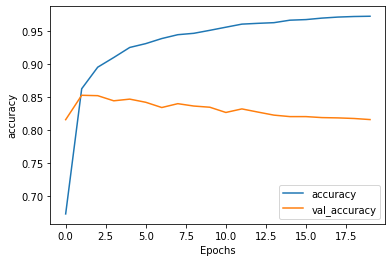

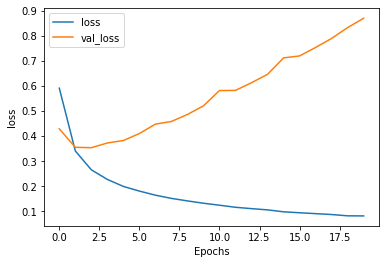

In [68]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Vocabulary size = 10000 
Embedding Dimensions = 16 
Max Length = 32


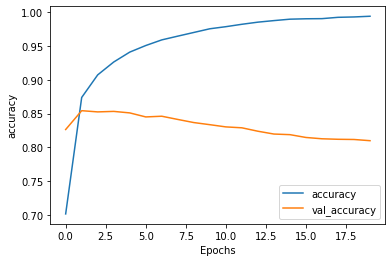

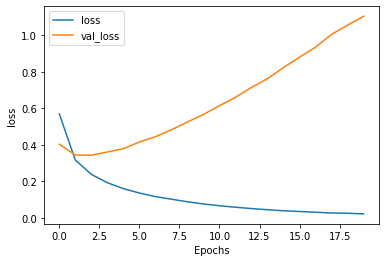

In [66]:
print("Vocabulary size = {} \nEmbedding Dimensions = {} \nMax Length = {}".format(10000, 16, 32))
listOfImageNames = ['Data/fig1.png',
                    'Data/fig2.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Vocabulary size = 10000 
Embedding Dimensions = 32 
Max Length = 60


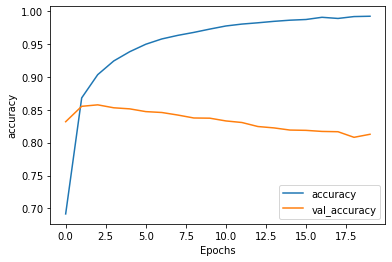

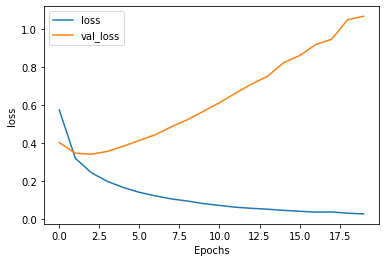

In [67]:
print("Vocabulary size = {} \nEmbedding Dimensions = {} \nMax Length = {}".format(10000, 32, 60))
listOfImageNames = ['Data/fig3.png',
                    'Data/fig4.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Vocabulary size = 7000 
Embedding Dimensions = 32 
Max Length = 60


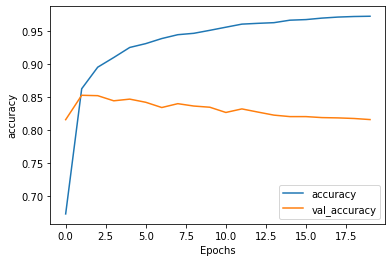

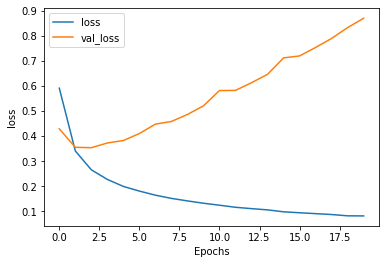

In [69]:
print("Vocabulary size = {} \nEmbedding Dimensions = {} \nMax Length = {}".format(7000, 32, 60))
listOfImageNames = ['Data/fig5.png',
                    'Data/fig6.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))